Data Acquisition:

a. Use the Yahoo Finance API to fetch historical stock prices and trading volumes for a predefined list of stocks. This list can be comprised of stocks from various sectors to provide a broad market overview.

b. Ensure data spans at least five years to analyze both short-term and long-term trends.

In [2]:
!pip install dash
!pip install pandas_datareader


import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas_datareader.data as web
from datetime import datetime
import seaborn as sns

# Predefined list of stocks
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JNJ', 'XOM', 'JPM', 'PG', 'NVDA']  # Broad market overview

# Define the time period
start_date = '2019-01-01'
end_date = '2024-01-01'

# Fetch historical stock prices and trading volumes
data={}

for stock in stocks:
  ticker = yf.Ticker(stock)
  hist = ticker.history(start=start_date, end=end_date)
  data[stock] = hist

# Combine all data into a single DataFrame with multi-level columns
combined_data = pd.concat(data, axis=1)
combined_data.index = pd.to_datetime(combined_data.index).date

# Save to a CSV file
combined_data.to_csv("historical_stock_prices_volumes.csv")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


<ipython-input-2-6947f2703dbb>:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-6947f2703dbb>:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Data Cleaning and Preparation:

a. Check for missing values and anomalies in the data. Missing data points should be interpolated or filled using a suitable method, such as forward filling or using the mean of nearby points.

b. Normalize the data if necessary to ensure consistency, especially when comparing stocks of different price ranges.

In [3]:
# Check missing values
combined_data.isnull().sum()

# Fill missing values
fillna_data = combined_data.fillna(method='ffill')

# Normalize data
normalized_data = (combined_data - combined_data.mean()) / combined_data.std()
normalized_data.head()

<ipython-input-3-2b52b82bee49>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fillna_data = combined_data.fillna(method='ffill')


AAPL                                                    \
                Open      High       Low     Close    Volume Dividends   
2019-01-02 -1.800759 -1.793965 -1.792739 -1.787236  0.885147 -0.126609   
2019-01-03 -1.856695 -1.860675 -1.856012 -1.867855  5.011481 -0.126609   
2019-01-04 -1.853875 -1.846297 -1.846700 -1.836745  2.524915 -0.126609   
2019-01-07 -1.832495 -1.844874 -1.835835 -1.838437  2.233774 -0.126609   
2019-01-08 -1.828086 -1.829682 -1.822280 -1.823984  1.188172 -0.126609   

                             MSFT                      ...        PG  \
           Stock Splits      Open      High       Low  ...    Volume   
2019-01-02    -0.028194 -1.866970 -1.855296 -1.858962  ...  0.803358   
2019-01-03    -0.028194 -1.859860 -1.875290 -1.881669  ...  0.795597   
2019-01-04    -0.028194 -1.864773 -1.845555 -1.859093  ...  1.039704   
2019-01-07    -0.028194 -1.839952 -1.835814 -1.832341  ...  0.531125   
2019-01-08    -0.028194 -1.821854 -1.826842 -1.822814  ...  0.707549   

                                       NVDA                                \
           Dividends Stock Splits      Open      High       Low     Close   
2019-01-02 -0.126528          NaN -1.159589 -1.152161 -1.154448 -1.150137   
2019-01-03 -0.126528          NaN -1.153328 -1.158658 -1.159224 -1.166505   
2019-01-04 -0.126528          NaN -1.158993 -1.153629 -1.155157 -1.150197   
2019-01-07 -0.126528          NaN -1.143967 -1.139618 -1.141537 -1.135857   
2019-01-08 -0.126528          NaN -1.127688 -1.135919 -1.140585 -1.142957   

                                             
              Volume Dividends Stock Splits  
2019-01-02  0.230683 -0.127052    -0.028194  
2019-01-03  1.215208 -0.127052    -0.028194  
2019-01-04  0.615228 -0.127052    -0.028194  
2019-01-07  1.233258 -0.127052    -0.028194  
2019-01-08  1.617743 -0.127052    -0.028194  

[5 rows x 70 columns]

Data Analysis:

a.Calculate moving averages for different time windows (e.g., 50-day and 200-day moving averages) to identify trends.

b.Use statistical measures such as the standard deviation and variance to assess market volatility.

c.Implement technical indicators like the Relative Strength Index (RSI) and Moving Average Convergence Divergence (MACD) to support trend analysis.

In [4]:
# Calculate MA
for stock in stocks:
  normalized_data[(f'{stock}','MA50')] = normalized_data[(f'{stock}','Close')].rolling(window=50).mean()
  normalized_data[(f'{stock}','MA200')] = normalized_data[(f'{stock}','Close')].rolling(window=200).mean()

# Calculate standard deviation and variance
Close_data = normalized_data.xs('Close', level=1, axis=1)
Returns = np.log(Close_data/Close_data.shift(1))
std_close = Close_data.std()
var_close = Close_data.var()
std_return = Returns.std()
var_return = Returns.var()

# Calculate 20 days rolling std, var
std_20 = Close_data.rolling(window=20).std()
var_20 = Close_data.rolling(window=20).var()

#Implement technical indicators
def RSI(price, time_period=14):
  delta = price.diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)
  # calculate average
  avg_gain = gain.rolling(window=time_period).mean()
  avg_loss = loss.rolling(window=time_period).mean()
  #calculate rs, rsi
  rs = avg_gain / avg_loss
  rsi = 100 - (100 / (1 + rs))
  return rsi

def MACD(price, short_period=12, long_period=26, signal_period=9):
  # Get short and long term
  short_term = price.ewm(span=short_period, adjust=False).mean()
  long_term = price.ewm(span=long_period, adjust=False).mean()
  # Get MACD line
  macd_line = short_term - long_term
  # Get signal line
  signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
  # Get histogram
  histogrm = macd_line - signal_line
  return macd_line, signal_line, histogrm

rsi_line = RSI(Close_data)
macd_line, signal_line, histogrm = MACD(Close_data)


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Visualization:

a. Develop interactive charts using libraries such as Matplotlib and Plotly in Python. These should include line graphs for stock prices and moving averages, histograms for volume analysis, and scatter plots for volatility assessment.

b. Create a dashboard that dynamically displays data and analytics results, allowing users to select different stocks or time frames for detailed analysis.


In [5]:
# HTML
# line graphs for stock prices and moving averages
for stock in stocks:
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=Close_data.index, y=Close_data[stock], mode='lines', name=stock))
  fig.add_trace(go.Scatter(x=Close_data.index, y=normalized_data[(f'{stock}','MA50')], mode='lines', name='MA50'))
  fig.add_trace(go.Scatter(x=Close_data.index, y=normalized_data[(f'{stock}','MA200')], mode='lines', name='MA200'))
  fig.update_layout(title=f'{stock} Stock Prices and Moving Averages', xaxis_title='Date', yaxis_title='Price')
  fig.show()
  fig.write_html(f'{stock}_stock_prices_and_moving_averages.html')

# histograms for volume
for stock in stocks:
  fig = go.Figure()
  fig.add_trace(go.Bar(x=Close_data.index, y=normalized_data[(f'{stock}','Volume')], name='Volume'))
  fig.update_layout(title=f'{stock} Volume Distribution', xaxis_title='Volume')
  fig.show()
  fig.write_html(f'{stock}_volume_distribution.html')

# scatter plots for volatility assessment
for stock in stocks:
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=Close_data.index, y=std_20[stock], mode='markers', name='Volatility'))
  fig.update_layout(title=f'{stock} Volatility Assessment', xaxis_title='Date', yaxis_title='Volatility')
  fig.show()
  fig.write_html(f'{stock}_volatility_assessment.html')

In [14]:
# dashborad
# Fetch and Process data
def fetch_data(ticker, start_date, end_date):
  ticker = yf.Ticker(ticker)
  hist = ticker.history(start=start_date, end=end_date)
  hist['MA50'] = hist['Close'].rolling(window=50).mean()
  hist['MA200'] = hist['Close'].rolling(window=200).mean()
  hist['Vatility'] = hist['Close'].rolling(window=20).std()
  hist.fillna(method='ffill', inplace=True)
  return hist

# Intialize the app
app = dash.Dash(__name__)
app.title = 'Stock Dashboard'

# Define layout
app.layout = html.Div([
    html.H1('Stock Dashboard', style= {'textAlign': 'center'}),

    # Dropdown for selecting stock ticker
    html.Div([
        html.Label('Select Stock Ticker:'),
        dcc.Dropdown(
            id='ticker-dropdown',
            options=[{'label': ticker, 'value': ticker} for ticker in stocks],
            value=stocks[0]
        ),
    ], style={'width': '50%', 'margin': 'auto'}),

    # Date picker
    html.Div([
        html.Label('Select Date Range:'),
        dcc.DatePickerRange(
            id='date-picker',
            start_date= start_date,
            end_date= end_date,
            display_format='YYYY-MM-DD'
        ),
    ], style={'width': '50%', 'margin': 'auto'}),
   # Place holder for graphs
    html.Div([
        dcc.Graph(id='stock-price-graph'),
        dcc.Graph(id='stock-volumn-graph'),
        dcc.Graph(id='volatility-graph'),
    ])
])

# Define callback
@app.callback(
    [Output('stock-price-graph', 'figure'),
     Output('stock-volumn-graph', 'figure'),
     Output('volatility-graph', 'figure')],
    [Input('ticker-dropdown', 'value'),
     Input('date-picker', 'start_date'),
     Input('date-picker', 'end_date')]
)

def update_graphs(ticker, start_date, end_date):
  # fetch data
  hist = fetch_data(ticker, start_date, end_date)
  hist.fillna(method='ffill', inplace=True)

  # Create price and MA chart
  price_fig = go.Figure()
  price_fig.add_trace(go.Scatter(x=hist.index, y=hist['Close'], mode='lines', name='Close'))
  price_fig.add_trace(go.Scatter(x=hist.index, y=hist['MA50'], mode='lines', name='MA50'))
  price_fig.add_trace(go.Scatter(x=hist.index, y=hist['MA200'], mode='lines', name='MA20'))
  price_fig.update_layout(title=f'{ticker} Stock Prices And Moving Average', xaxis_title='Date', yaxis_title='Price')

  # Create volume histogram
  volume_fig = go.Figure()
  volume_fig.add_trace(go.Bar(x=hist.index, y=hist['Volume'], name='Volume'))
  volume_fig.update_layout(title=f'{ticker} Volume Distribution', xaxis_title='Volume')

  # Create volatility scatter plot
  volatility_fig = go.Figure()
  volatility_fig.add_trace(go.Scatter(x=hist.index, y=hist['Vatility'], mode='markers', name='Volatility'))
  volatility_fig.update_layout(title=f'{ticker} Volatility Assessment', xaxis_title='Date', yaxis_title='Volatility')

  return price_fig, volume_fig, volatility_fig

if __name__ == '__main__':
  app.run_server(debug=True)

<IPython.core.display.Javascript object>

Interpretation of Results:

a. Analyze the output from the moving averages and technical indicators to identify potential buy or sell signals.

b. Compare the performance of different stocks and identify any correlations between market movements and external economic indicators.

In [ ]:
# Create rsi and macd image
for stock in stocks:
  # create subplots
  fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("RSI", "MACD"))

  # RSI
  fig.add_trace(go.Scatter(x=rsi_line.index, y=rsi_line[stock], mode='lines', name='RSI'), row=1, col=1)
  fig.add_hline(y=70, line_dash="dot", line_color="red", row=1, col=1)
  fig.add_hline(y=30, line_dash="dot", line_color="red", row=1, col=1)

  #MACD
  fig.add_trace(go.Scatter(x=macd_line.index, y=macd_line[stock], mode='lines', name='MACD'), row=2, col=1)
  fig.add_trace(go.Scatter(x=signal_line.index, y=signal_line[stock], mode='lines', name='Signal'), row=2, col=1)
  fig.add_trace(go.Bar(x=histogrm.index, y=histogrm[stock], name='Histogram' ,marker_color='black'), row=2, col=1)

  # Update layout
  fig.update_layout(title=f'{stock} RSI and MACD',
                    xaxis_title='Date',
                    yaxis_title='Value',
                    template="plotly_white",
                    height=800)
  fig.show()
  fig.write_html(f'{stock}_rsi_and_macd.html')


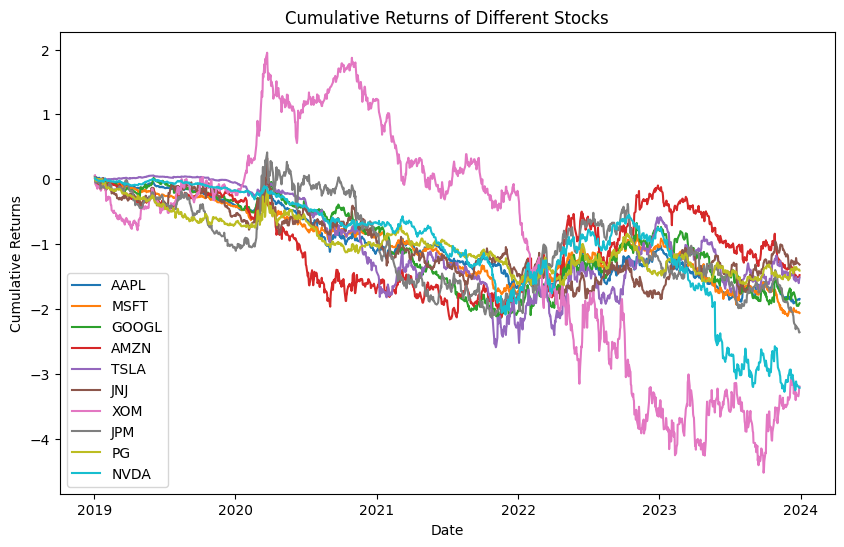

Correlation with Interest Rate:
AAPL    -0.022496
MSFT     0.028362
GOOGL    0.013865
AMZN     0.056015
TSLA    -0.047709
JNJ     -0.066603
XOM     -0.003563
JPM      0.014000
PG       0.039268
NVDA     0.012882
dtype: float64


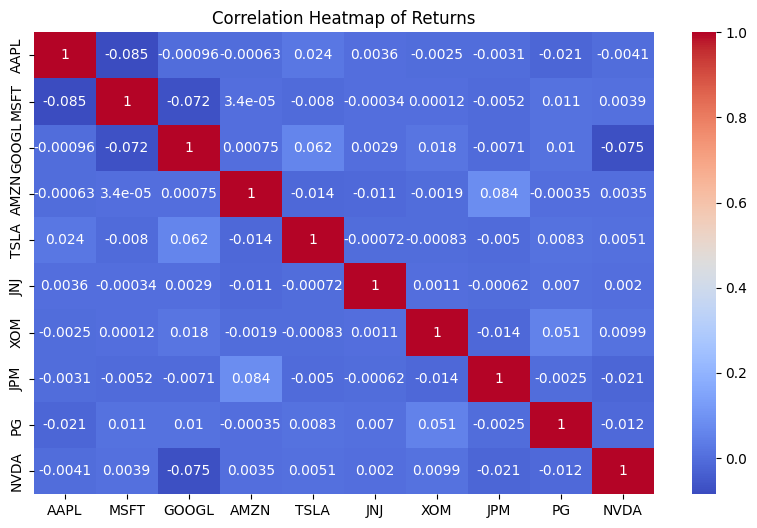

In [ ]:
# Compare the performance of different stocks

# Get returns of different stocks
returns = Close_data.pct_change()

# Cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6)
                        , title='Cumulative Returns of Different Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.savefig('cumulative_returns.png')
plt.show()


# Get correlations between market movements and external economic indicators

# Get 10-Year Treasury Constant Maturity Rate

# Set time
start = datetime(2019, 1, 1)
end = datetime(2024, 1, 1)
t10yr = web.DataReader('DGS10', 'fred', start, end)

# Cal the corr between stocks and t10yr
correlation = returns.corrwith(t10yr['DGS10'])
print("Correlation with Interest Rate:")
print(correlation)

# Visualizating correlation
plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Returns')
plt.savefig('correlation_heatmap.png')
plt.show()